<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Import-Packages" data-toc-modified-id="1.-Import-Packages-1">1. Import Packages</a></span></li><li><span><a href="#2.-Read-in-Data" data-toc-modified-id="2.-Read-in-Data-2">2. Read in Data</a></span></li><li><span><a href="#3.-Model-Set-Up" data-toc-modified-id="3.-Model-Set-Up-3">3. Model Set Up</a></span><ul class="toc-item"><li><span><a href="#Choosing-Target" data-toc-modified-id="Choosing-Target-3.1">Choosing Target</a></span></li><li><span><a href="#Viewing-Baseline-Accuracy-Score" data-toc-modified-id="Viewing-Baseline-Accuracy-Score-3.2">Viewing Baseline Accuracy Score</a></span></li><li><span><a href="#Target-Metric" data-toc-modified-id="Target-Metric-3.3">Target Metric</a></span></li><li><span><a href="#Setting-Potential-Model-Features" data-toc-modified-id="Setting-Potential-Model-Features-3.4">Setting Potential Model Features</a></span></li><li><span><a href="#Considering-Potential-Models" data-toc-modified-id="Considering-Potential-Models-3.5">Considering Potential Models</a></span></li><li><span><a href="#Setting-Variables-and-Train-/-Test-Split" data-toc-modified-id="Setting-Variables-and-Train-/-Test-Split-3.6">Setting Variables and Train / Test Split</a></span></li><li><span><a href="#Scaling-Features" data-toc-modified-id="Scaling-Features-3.7">Scaling Features</a></span></li></ul></li><li><span><a href="#4.-Modeling" data-toc-modified-id="4.-Modeling-4">4. Modeling</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-4.1">Logistic Regression</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-4.2">Decision Tree</a></span></li><li><span><a href="#Bagging-Classifier" data-toc-modified-id="Bagging-Classifier-4.3">Bagging Classifier</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-4.4">Random Forest</a></span></li><li><span><a href="#Extra-Trees" data-toc-modified-id="Extra-Trees-4.5">Extra Trees</a></span></li><li><span><a href="#Gradient-Boosting-Classifier" data-toc-modified-id="Gradient-Boosting-Classifier-4.6">Gradient Boosting Classifier</a></span></li><li><span><a href="#Ada-Boosting-Classifer" data-toc-modified-id="Ada-Boosting-Classifer-4.7">Ada Boosting Classifer</a></span></li></ul></li><li><span><a href="#5.-Model-Evaluations" data-toc-modified-id="5.-Model-Evaluations-5">5. Model Evaluations</a></span><ul class="toc-item"><li><span><a href="#Accuracy" data-toc-modified-id="Accuracy-5.1">Accuracy</a></span></li><li><span><a href="#Area-Under-the-ROC-Curve" data-toc-modified-id="Area-Under-the-ROC-Curve-5.2">Area Under the ROC Curve</a></span></li><li><span><a href="#Specificity" data-toc-modified-id="Specificity-5.3">Specificity</a></span></li><li><span><a href="#Sensitivity" data-toc-modified-id="Sensitivity-5.4">Sensitivity</a></span></li></ul></li><li><span><a href="#6.-Final-Model-Selection-and-Analysis" data-toc-modified-id="6.-Final-Model-Selection-and-Analysis-6">6. Final Model Selection and Analysis</a></span><ul class="toc-item"><li><span><a href="#Bagged-Classifier" data-toc-modified-id="Bagged-Classifier-6.1">Bagged Classifier</a></span></li><li><span><a href="#Feature-Importance" data-toc-modified-id="Feature-Importance-6.2">Feature Importance</a></span></li><li><span><a href="#Conclusions-and-Recommendations" data-toc-modified-id="Conclusions-and-Recommendations-6.3">Conclusions and Recommendations</a></span><ul class="toc-item"><li><span><a href="#Question-1" data-toc-modified-id="Question-1-6.3.1">Question 1</a></span></li><li><span><a href="#Question-2" data-toc-modified-id="Question-2-6.3.2">Question 2</a></span></li><li><span><a href="#Question-3" data-toc-modified-id="Question-3-6.3.3">Question 3</a></span></li></ul></li><li><span><a href="#Potential-Next-Steps" data-toc-modified-id="Potential-Next-Steps-6.4">Potential Next Steps</a></span></li></ul></li></ul></div>

# 1. Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_auc_score
from tqdm import tqdm
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# 2. Read in Data

In [3]:
data = pd.read_csv('../data/modeling_data.csv')
data.drop(columns = ['Unnamed: 0'], inplace = True)

In [4]:
data.shape

(64043, 78)

# 3. Model Set Up

## Choosing Target

If you'll recall in the previous notebook, we created a number of different target classes that reflected longer time frames.  Essentially, the question we were asking was: after playing in this game, did this player suffer an injury in a. the game, b. the next week, c. the next two weeks, d. the next three weeks, or e. the next month. We did this to solve the imbalanced class issue.  We will check below to see the amount of the positive class in each scenario.

In [5]:
# injury suffered in game
data['injury_suff'].value_counts(normalize = True)

0    0.981903
1    0.018097
Name: injury_suff, dtype: float64

In [6]:
# injury suffered in next week
data['1week_inj'].value_counts(normalize = True)

0    0.916291
1    0.083709
Name: 1week_inj, dtype: float64

In [7]:
# injury suffered in next two weeks
data['2week_inj'].value_counts(normalize = True)

0    0.86659
1    0.13341
Name: 2week_inj, dtype: float64

In [8]:
# injury suffered in next three weeks
data['3week_inj'].value_counts(normalize = True)

0    0.823166
1    0.176834
Name: 3week_inj, dtype: float64

In [9]:
# injury suffered in next month
data['1month_inj'].value_counts(normalize = True)

0    0.771372
1    0.228628
Name: 1month_inj, dtype: float64

We wanted a class balance in the 80/20 range, so we will proceed with the one month injury time frame.

## Viewing Baseline Accuracy Score

As seen above, our baseline accuracy score is 77.1%.

## Target Metric

We note that with this model, there are a couple of different metrics we might want to look at.  We may want to look at the overall accuracy.  In fact, when we test our model metrics, we will be looking at both accuracy and area under the ROC curve to compare the models.  However, for this project, for our final  we want to be looking at sensitivity for our target score.  NBA teams tend to be risk averse and with injuries, we want to be sure we are maximizing our prevention.  There are situations where specificity matters (e.g. you hold a player out of a game and your team ends up missing the playoffs by one game) but we feel that we are focused on long term team success and in this case, prevention is key.

## Setting Potential Model Features

In [10]:
targets = ['injury_suff', '1week_inj', '2week_inj', '3week_inj', '1month_inj']
objects = ['name', 'date', 'year', 'opponent', 'result', 'day', 'month', 'fg_made_attempts', '3p_made_attempts',
           'ft_made_attempts', 'season']
potential_features = list(data.columns.drop(targets + objects))

We note that with our models, we will largely be using regularization techniques and grid searching to limit the impact of nonessential features and reduce overfitting.

## Considering Potential Models

At this point, we note that our potential models will be classification models.  These include:

- Logistic Regression
- KNN
- Decision Trees
- Bagging Classifiers
- Random Forests
- Extra Trees
- Boosting Classifiers
- Support Vector Classifiers

## Setting Variables and Train / Test Split

In [11]:
X = data[potential_features]
y = data['1month_inj']

In [12]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 100)

In [13]:
X_train.shape

(48032, 62)

In [14]:
X_test.shape

(16011, 62)

In [15]:
y_train.value_counts(normalize = True)

0    0.771382
1    0.228618
Name: 1month_inj, dtype: float64

In [16]:
y_test.value_counts(normalize = True)

0    0.771345
1    0.228655
Name: 1month_inj, dtype: float64

## Scaling Features

For some of our models, we may want to scale our features using Standard Scaler, which is accomplished below.

In [17]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# 4. Modeling

## Logistic Regression

In [18]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
lr.score(X_train, y_train)

0.7704238840772818

In [20]:
lr.score(X_test, y_test)

0.7702204734245206

Because our model is not overfit, we do not need to regularize for Logistic Regression.  However, we note that this will likely not be our best choice model as it actually underperforms our baseline accuracy score.

Note that we will do a more robust model evaluation (including Sensitivity and Area under the ROC) after completing our modeling.

## Decision Tree

In [21]:
dt_params = {
    'max_depth' : [50, 75, 100, 125, 150, None],
    'min_samples_split' : [2, 3, 4],
    'min_samples_leaf' : [2, 3, 4]
}

dt_gs = GridSearchCV(estimator = DecisionTreeClassifier(),
                     param_grid = dt_params,
                     cv = 5,
                     verbose = 1,
                     n_jobs = -1)

In [22]:
dt_gs.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   57.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [50, 75, 100, 125, 150, None],
                         'min_samples_leaf': [2, 3, 4],
             

In [23]:
dt_gs.best_params_

{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 3}

In [24]:
dt_gs.score(X_train, y_train)

0.9880912724850099

In [25]:
dt_gs.score(X_test, y_test)

0.9121229154955968

In [26]:
dt = dt_gs.best_estimator_

## Bagging Classifier

We note that we want to continue using all 63 features in our model as we are particularly concerned with model interpratability - we want to eventually advise teams on what things to look for when determining injury risk (aside from simply using our model).

In [27]:
bag_params = {
    'n_estimators' : [65, 75, 85],
    'max_features' : [1, 20, 50, 62]  
}

bag_gs = GridSearchCV(estimator = BaggingClassifier(),
                      param_grid = bag_params, 
                      cv = 5,
                      n_jobs = -1)

In [28]:
bag_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=None,
                                         verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_features': [1, 20, 50, 62],
                         'n_estimators': [65, 75, 85]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [29]:
bag_gs.score(X_train, y_train)

1.0

In [30]:
bag_gs.score(X_test, y_test)

0.9479108113172194

In [31]:
bag_gs.best_params_

{'max_features': 62, 'n_estimators': 75}

In [32]:
bag = bag_gs.best_estimator_

Because bagging is an ensemble method, feature importance is not available on for the model as a whole.  However, we can access each tree within the bagging model's feature importance and average the scores to get our feature importance for each of our 63 features.  We will want to access these later should we determine that bagging is our best model.

In [33]:
bag_feature_importances = np.mean([
    tree.feature_importances_ for tree in bag.estimators_
], axis=0)

## Random Forest

In [34]:
rf_params = {
    'n_estimators' : [51, 61, 71],
    'max_depth' : [40, 45, 50],
    'min_samples_split' : [2, 3],
    'min_samples_leaf' : [2, 3],
}

rf_gs = GridSearchCV(estimator = RandomForestClassifier(),
                     param_grid = rf_params,
                     cv = 5,
                     n_jobs = -1,
                     verbose = 5)

In [35]:
rf_gs.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  3.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [36]:
rf_gs.score(X_train, y_train)

0.9985634576948701

In [37]:
rf_gs.score(X_test, y_test)

0.9075010929985635

In [38]:
rf_gs.best_params_

{'max_depth': 45,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 61}

In [39]:
rf = rf_gs.best_estimator_

We need to follow a similar process as we did for Bagging to extract the feature importances for the Random Forest.

In [40]:
rf_feature_importances = np.mean([
    tree.feature_importances_ for tree in rf.estimators_
], axis=0)

## Extra Trees

In [41]:
et_params = {
    'n_estimators' : [51, 61, 71],
    'max_depth' : [40, 45, 50],
    'min_samples_split' : [2, 3],
    'min_samples_leaf' : [2, 3],
}

et_gs = GridSearchCV(estimator = ExtraTreesClassifier(),
                     param_grid = et_params,
                     cv = 5,
                     n_jobs = -1,
                     verbose = 5)

In [42]:
et_gs.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None,
                                            criterion='gini', max_depth=None,
                                            max_features='auto',
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators='warn', n_jobs=None,
                                            oob_score=False, random_state=None,
                                            verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [40, 45, 50

In [43]:
et_gs.score(X_train, y_train)

0.9999791805463024

In [44]:
et_gs.score(X_test, y_test)

0.8649678346137031

In [45]:
et_gs.best_params_

{'max_depth': 45,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 51}

In [46]:
et = et_gs.best_estimator_

In [47]:
et_feature_importances = np.mean([
    tree.feature_importances_ for tree in et.estimators_
], axis=0)

## Gradient Boosting Classifier

In [48]:
grad_params = {
    'n_estimators' : [95, 105],
}

grad_gs = GridSearchCV(estimator = GradientBoostingClassifier(),
                       param_grid = grad_params,
                       cv = 5,
                       n_jobs = -1,
                       verbose = True)

In [49]:
grad_gs.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   22.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [50]:
grad_gs.score(X_train, y_train)

0.7913890739506996

In [51]:
grad_gs.score(X_test, y_test)

0.7870838798326151

In [52]:
grad_gs.best_params_

{'n_estimators': 105}

In [53]:
grad = grad_gs.best_estimator_

Gradient Boost has a feature importance method that we can call should we determine this to be our best model.

## Ada Boosting Classifer

In [54]:
ada_params = {
    'n_estimators' : [95, 105],
}

ada_gs = GridSearchCV(estimator = AdaBoostClassifier(),
                      param_grid = ada_params,
                      cv = 5,
                      n_jobs = -1,
                      verbose = 7)

In [55]:
ada_gs.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:   14.7s remaining:   34.2s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   14.7s remaining:   14.7s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   15.7s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   15.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=-1, param_grid={'n_estimators': [95, 105]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=7)

In [56]:
ada_gs.score(X_train, y_train)

0.7809585276482345

In [57]:
ada_gs.score(X_test, y_test)

0.7774030354131535

In [58]:
ada_gs.best_params_

{'n_estimators': 95}

In [59]:
ada = ada_gs.best_estimator_

# 5. Model Evaluations

Now that we have our best fit models determined through grid searching, we want to evaluate our models on a number of metrics related to the testing set

We will be evaluating our models on how well they perform on the testing set as we want to confirm how these models perform on unseen data.  Additionally, given our heavy focus on tree based models, we want to account for any potential overfitting by just looking at the testing set performance.

In [60]:
models = [lr, dt, bag, rf, et, grad, ada]
model_titles = ['Logistic Regression', 'Decision Tree', 'Bagging Classifier', 'Random Forest', 'Extra Trees',
                'Gradient Boost', 'Ada Boost']

In [61]:
def model_metrics(model_list):
    accuracies = [model.score(X_test, y_test) for model in model_list]
    auc_rocs = [roc_auc_score(y_test, model.predict(X_test)) for model in model_list]
    sensitivies = []
    specificities = []
    for model in model_list:
        tn, fp, fn, tp = confusion_matrix(y_test, model.predict(X_test)).ravel()
        sens = tp / (tp + fn)
        sensitivies.append(sens)
        spec = tn / (tn + fp)
        specificities.append(spec)
    return accuracies, auc_rocs, sensitivies, specificities

In [62]:
accuracies, auc_rocs, sensitivities, specificities = model_metrics(models)

## Accuracy

In [63]:
# putting testing accuracies into a dataframe for plotting
acc_frame = pd.DataFrame({'model' : model_titles, 'acc' : accuracies}).sort_values('acc', ascending = True)

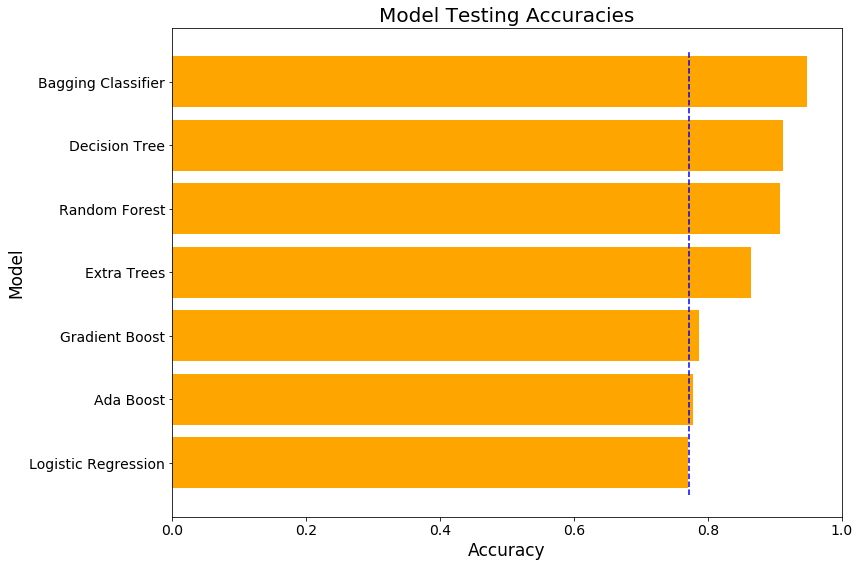

In [64]:
plt.figure(figsize = (12, 9));
plt.barh(acc_frame['model'], acc_frame['acc'], color = 'orange');
plt.xlim([0, 1]);
plt.xlabel('Accuracy', size = 17);
plt.ylabel('Model', size = 17);
plt.xticks(size = 14);
plt.yticks(size = 14);
plt.title('Model Testing Accuracies', size = 20);
plt.vlines(x = y_test.value_counts(normalize = True)[0], ymin = -0.5, ymax = 6.5,
           label = 'Baseline Accuracy Score', color = 'blue', linestyles = 'dashed');

## Area Under the ROC Curve

In [65]:
auc_roc_frame = pd.DataFrame({'model' : model_titles, 'auc_roc' : auc_rocs}).sort_values('auc_roc', ascending = True)

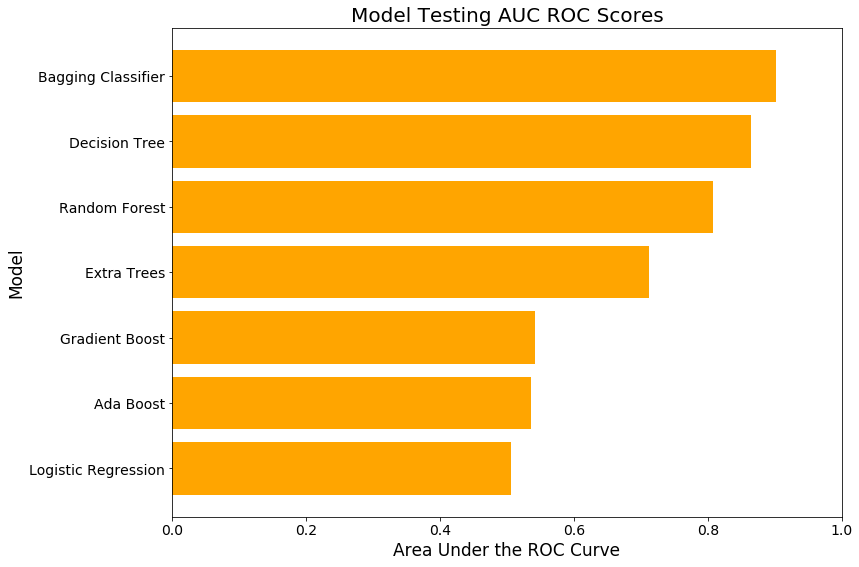

In [66]:
plt.figure(figsize = (12, 9));
plt.barh(auc_roc_frame['model'], auc_roc_frame['auc_roc'], color = 'orange');
plt.xlim([0, 1]);
plt.xlabel('Area Under the ROC Curve', size = 17);
plt.ylabel('Model', size = 17);
plt.xticks(size = 14);
plt.yticks(size = 14);
plt.title('Model Testing AUC ROC Scores', size = 20);

## Specificity

In [67]:
spec_frame = pd.DataFrame({'model' : model_titles, 'spec' : specificities}).sort_values('spec', ascending = True)

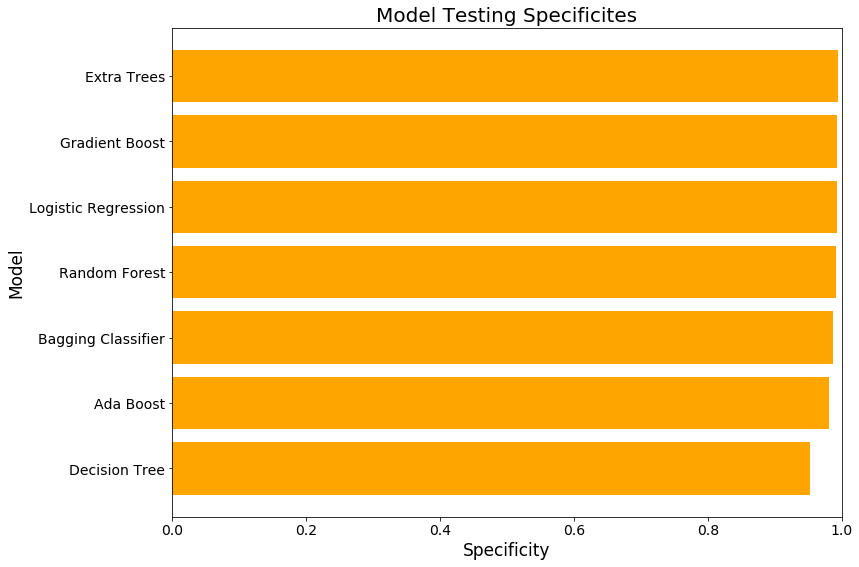

In [68]:
plt.figure(figsize = (12, 9));
plt.barh(spec_frame['model'], spec_frame['spec'], color = 'orange');
plt.xlim([0, 1]);
plt.xlabel('Specificity', size = 17);
plt.ylabel('Model', size = 17);
plt.xticks(size = 14);
plt.yticks(size = 14);
plt.title('Model Testing Specificites', size = 20);

## Sensitivity

In [69]:
sens_frame = pd.DataFrame({'model' : model_titles, 'sens' : sensitivities}).sort_values('sens', ascending = True)

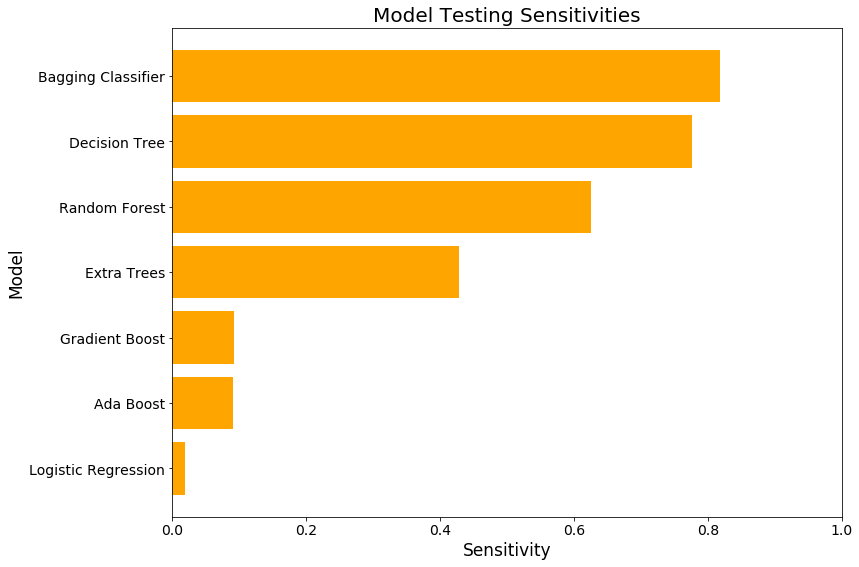

In [70]:
plt.figure(figsize = (12, 9));
plt.barh(sens_frame['model'], sens_frame['sens'], color = 'orange');
plt.xlim([0, 1]);
plt.xlabel('Sensitivity', size = 17);
plt.ylabel('Model', size = 17);
plt.xticks(size = 14);
plt.yticks(size = 14);
plt.title('Model Testing Sensitivities', size = 20);

# 6. Final Model Selection and Analysis

We mentioned this above but to reiterate, we will be using highest testing set sensitivity for our final model selection.  Triggering false positives is certainly something we would like to avoid in our predictions - resting a player or otherwise limiting him could mean the loss of games and with it, valuable playoff spots and seeding.  This certainly matters.  However, we are choosing to focus our analysis on big picture framing.  We want teams to know when their player is an injury risk to best plan for this player's long term health in the hopes that the team can optimize his rest and repititions in the game.  This is especially valuable to teams in legitimate title contention where winning on a game to game basis is not necessarily the primary goal in the regular season - the primary goal would be to ensure you are best positioned to compete for a championship come playoff time.  

## Bagged Classifier

Ultimately, our best models were our tree based models.  At the end, our Bagged Decision Tree scored the best on accuracy, area under the ROC curve, and (most importantly) sensitivy.  The final metrics for this model are as follows:

- Sensitivity: 81.8%
- Accuracy : 94.8%
- Specificity: 98.6%
- AUC ROC Score: .90

The fairly large difference between sensitiviy and accuracy is unsuprising given our somewhat unbalanced classes.  However, with a sensitivity at this level we are still comfortable with our model's performance.

## Feature Importance

With our final Bagged Classifier, we can view the feature importances on our features as a means of identifying what drives player injuries.  Looking at these feature importances can help us advise teams on how best to manage different players.

In [71]:
feature_frame = pd.DataFrame({'feature' : potential_features, 
                              'importance' : bag_feature_importances}).sort_values('importance', ascending = True)

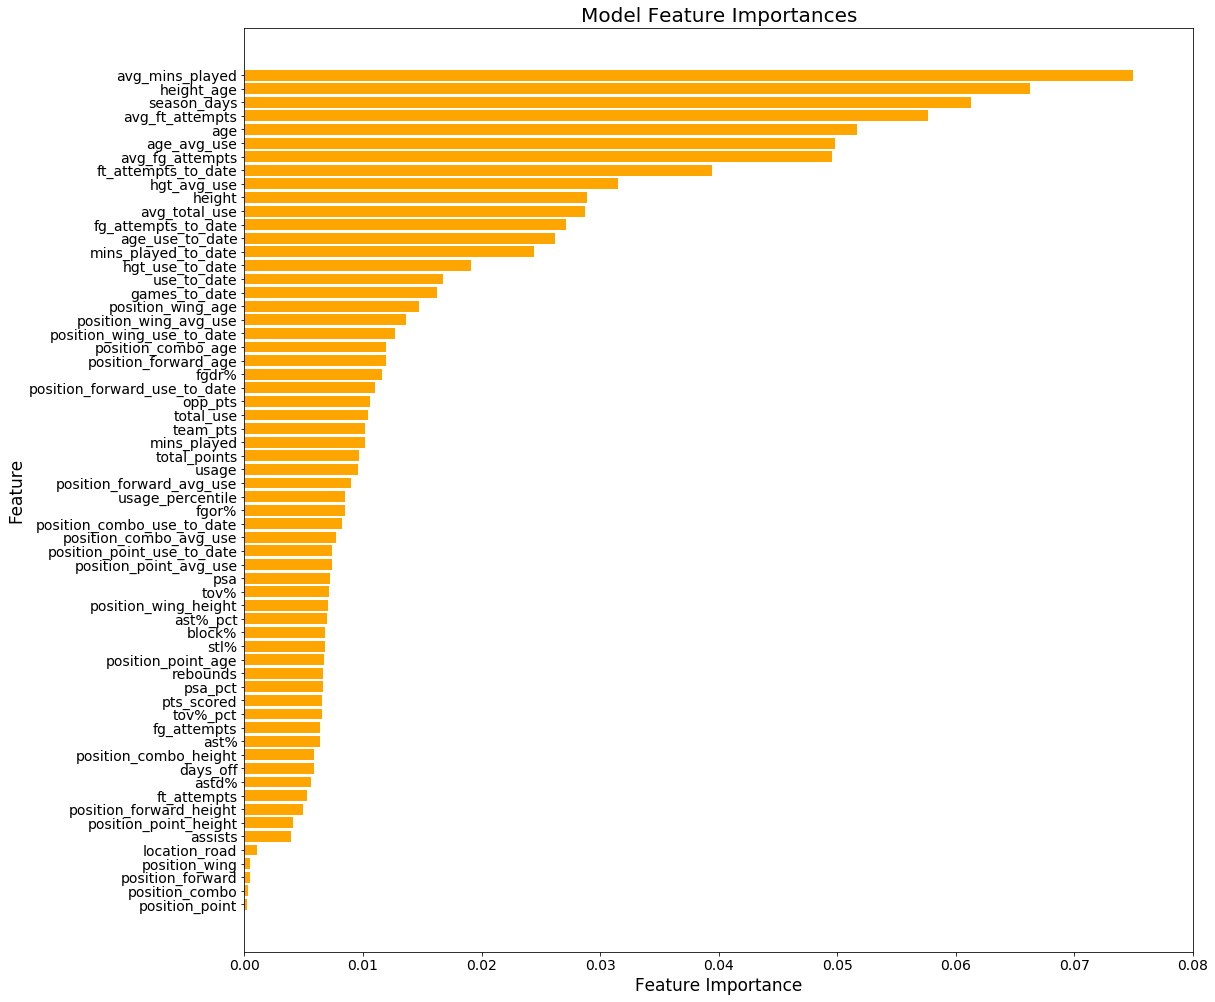

In [72]:
plt.figure(figsize = (17, 17));
plt.barh(feature_frame['feature'], feature_frame['importance'], color = 'orange');
plt.xlim([0, 0.08]);
plt.xlabel('Feature Importance', size = 17);
plt.ylabel('Feature', size = 17);
plt.xticks(size = 14);
plt.yticks(size = 14);
plt.title('Model Feature Importances', size = 20);

This chart shows us all features in our Data Frame.  We can view just the top 20 as well.

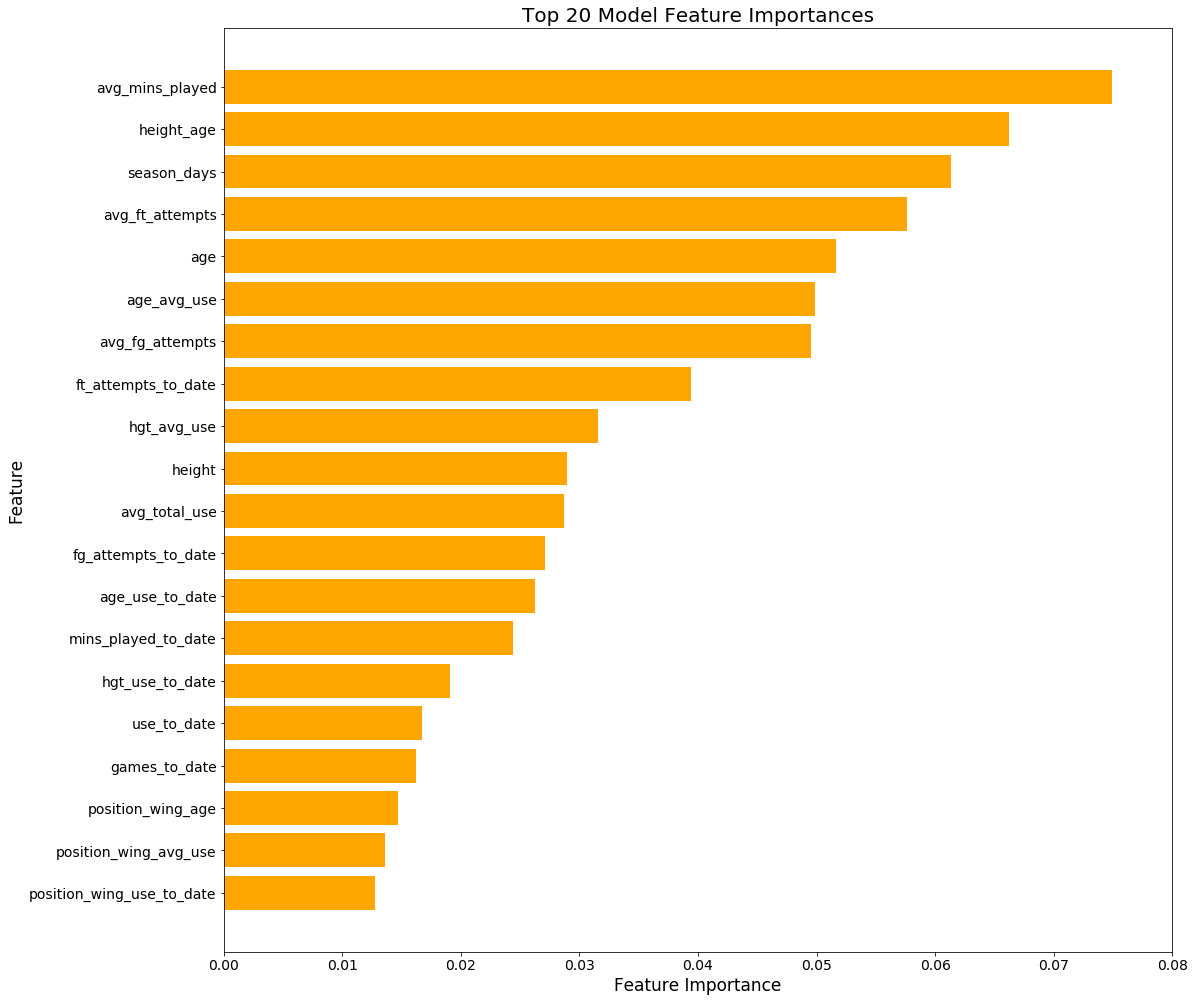

In [73]:
plt.figure(figsize = (17, 17));
plt.barh(feature_frame['feature'].tail(20), feature_frame['importance'].tail(20), color = 'orange');
plt.xlim([0, 0.08]);
plt.xlabel('Feature Importance', size = 17);
plt.ylabel('Feature', size = 17);
plt.xticks(size = 14);
plt.yticks(size = 14);
plt.title('Top 20 Model Feature Importances', size = 20);

## Conclusions and Recommendations

Ultimately, this project seeks to answer a few questions:

1. Can we build a model to predict player injuries?
2. How can teams use these predictions?
3. How can teams use the coefficients/feature importances of the model to drive overall strategy and thinking about how to handle injuries?

### Question 1

As we have proven above, the answer to this question is yes.  At this point, we are unable to provide a narrower timeline than one month on our predictions.  However, we feel comfortable that our model will pick up on roughly 80% of player injuries before they occur.  

We talk about player injuries as random events - a twist of the ankle, a hit to the arm, a pulled muscle and other things that are typically viewed as bad luck.  As a result, we are fairly confident that we have debunked this line of thinking and that we can use PUBLICLY available data to better predict player injuries.

### Question 2

There are a number of ways this model can be used.  The first and most obvious is in the moment decision making: if our model predicts that a player is set to pick up an injury, the coaching staff can take a number of measures to attempt to prevent this or limit the damage including holding the player out of games, limiting the player's minutes in the games he does play, or even limiting the players involvement in the minutes he is playing.  It is ultimately up to the discretion of the coach and highly dependent on team context on how the coach can handle this, but these are all valid strategies and can help a team prevent injuries to its prized assets.

The second way this model can be used is to evaluate player transaction decisions.  If this model has recently deemed a player at a higher risk of injury, the front office in question may hesitate to acquire the player in a trade or off free agency or otherwise devalue the player.  This model can also be combined with other predictive models.  For instance, if we have simulations on how a given players season will look, we can potentially also predict the likelihood the player will suffer an injury during the season.  Interestingly, the same can be true for the NBA Draft.  For instance, if our analytics department has a model to simulate a prospect's rookie season, we can potentially assess injury risk for that player and adjust our draft ranking accordingly.  

### Question 3

Finally, we can view the feature importances of our model to adjust our high level thinking of injuries.  This is somewhat similar to our answer to Question 2 but allows us to build a general analytical framework for how we view these sorts of problems as opposed to simply making predictions.  Our key takeaways and conclusions from viewing the feature importances are below.  Some are suprising and some are less so.

- Minutes:  Ultimately, the more minutes you play, the more likely you are to be injury prone.  As such, in trying to reduce injuries we know that additional rest for players in games is crucial.
- Workload:  We see scattered throughout the top features various references to offensive workload.  These include free throw attempts, field goal attempts, and a number of interaction features related to player usage.  Ultimately, thinking about how to limit a players offensive workload in an effective manner can be an important step to limiting injuries.
- Games Played / Season Timeline:  Unsuprisingly, injuries are more likely the more games played and the further into the season for a player.
- Height: It appears that taller players suffer more injuries but in particular, taller players who are heavily features in an offense suffer additional injuries.
- Age:  We see a similar story with age as with height.  Teams need to be more careful with older players, particularly those who still take on a heavy workload.

The one crucial feature that does not appear amongst the most important that merits discussion is days off between games.  There has been a great deal of discussion in the NBA surrounding player rest and limiting involvement in games played on back to back nights, particularly with superstar players.  However, our model does not seem to think the breaks between games play a particulary important role in injury prevention.

## Potential Next Steps

There are some next steps we can take that we feel will improve our model even further.  

1. Player tracking data.  The NBA works with Second Spectrum to provide player tracking data such as foot speed, total movement, and other movement data.  Right now, the NBA only provides this data on an annual per game average basis, not on a game by game basis. If we are able to obtain this on a game by game basis and add it to the game logs, we feel that we will be able to further improve our model.
2. Additional player data such as weight, flexibility, and other athletic metrics.
3. Finally, we feel that NBA teams may have increased knowledge of certain issues with players such as minor injuries that do not cause a player to miss games or diet of the players that could help our predictions.